## Importing Libraries

In [49]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeRegressor

### Importing Data and Data summary

In [2]:
train = pd.read_csv('Train_DATA.csv')
test = pd.read_csv('Test_DATA.csv')

In [3]:
train.head()
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [4]:
train.shape

(8523, 12)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
Item_Identifier              8523 non-null object
Item_Weight                  7060 non-null float64
Item_Fat_Content             8523 non-null object
Item_Visibility              8523 non-null float64
Item_Type                    8523 non-null object
Item_MRP                     8523 non-null float64
Outlet_Identifier            8523 non-null object
Outlet_Establishment_Year    8523 non-null int64
Outlet_Size                  6113 non-null object
Outlet_Location_Type         8523 non-null object
Outlet_Type                  8523 non-null object
Item_Outlet_Sales            8523 non-null float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [6]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

## Filling null values in test and train 

In [7]:
train['Outlet_Size'].fillna('Medium',inplace=True)
train['Outlet_Size'].isnull().sum()

0

In [8]:
train['Item_Weight'].fillna(train['Item_Weight'].mean(),inplace=True)
train['Item_Weight'].isnull().sum()

0

In [9]:
train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
Item_Identifier              5681 non-null object
Item_Weight                  4705 non-null float64
Item_Fat_Content             5681 non-null object
Item_Visibility              5681 non-null float64
Item_Type                    5681 non-null object
Item_MRP                     5681 non-null float64
Outlet_Identifier            5681 non-null object
Outlet_Establishment_Year    5681 non-null int64
Outlet_Size                  4075 non-null object
Outlet_Location_Type         5681 non-null object
Outlet_Type                  5681 non-null object
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [11]:
test.shape

(5681, 11)

In [12]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [13]:
test['Outlet_Size'].fillna('Medium',inplace=True)
test['Outlet_Size'].isnull().sum()

0

In [14]:
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)
test['Item_Weight'].isnull().sum()

0

In [15]:
test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


## Plotting relationships with the dependent variable

Text(0.5, 1.0, 'Item_Outlet_Sales Distribution')

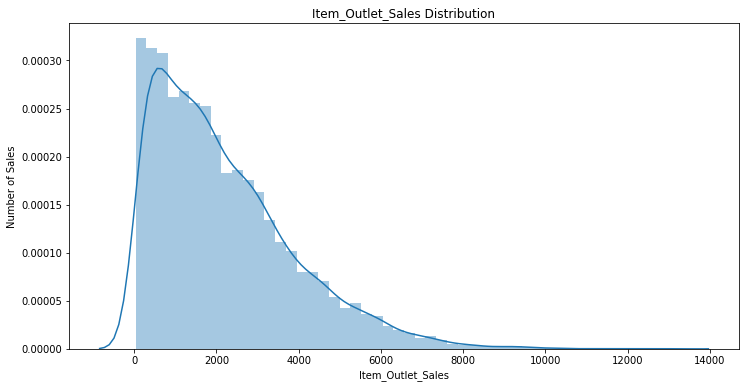

In [16]:
plt.figure(figsize=(12,6))
sns.distplot(train.Item_Outlet_Sales, bins = 50)
plt.ticklabel_format(style='plain', axis='x', scilimits=(0,1))
plt.xlabel("Item_Outlet_Sales")
plt.ylabel("Number of Sales")
plt.title("Item_Outlet_Sales Distribution")

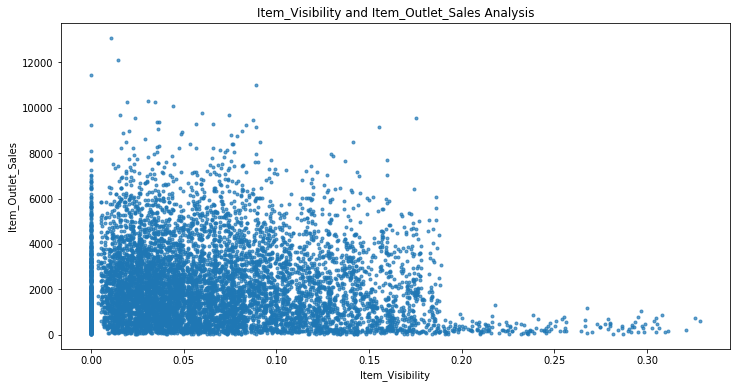

In [17]:
plt.figure(figsize=(12,6))
plt.xlabel("Item_Visibility")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Visibility and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Visibility, train.Item_Outlet_Sales,'.', alpha = 0.7)

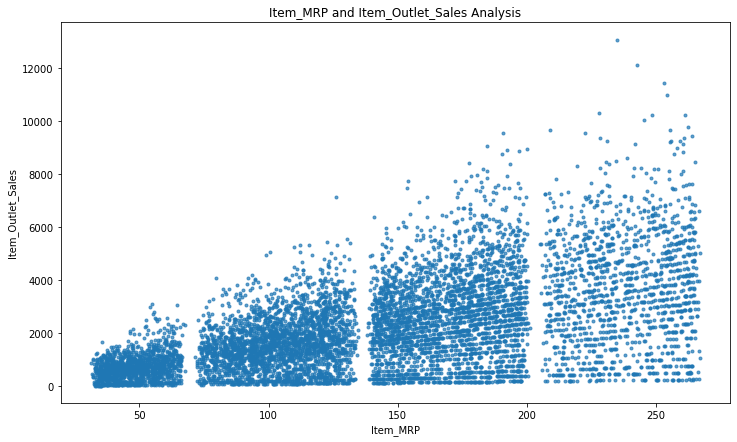

In [18]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_MRP")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_MRP and Item_Outlet_Sales Analysis")
plt.plot(train.Item_MRP, train.Item_Outlet_Sales,'.', alpha = 0.7)

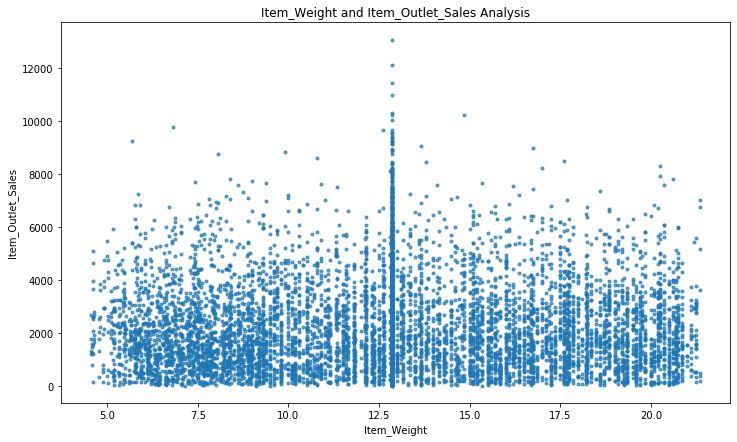

In [19]:
plt.figure(figsize=(12,7))
plt.xlabel("Item_Weight")
plt.ylabel("Item_Outlet_Sales")
plt.title("Item_Weight and Item_Outlet_Sales Analysis")
plt.plot(train.Item_Weight, train.Item_Outlet_Sales,'.', alpha = 0.7)

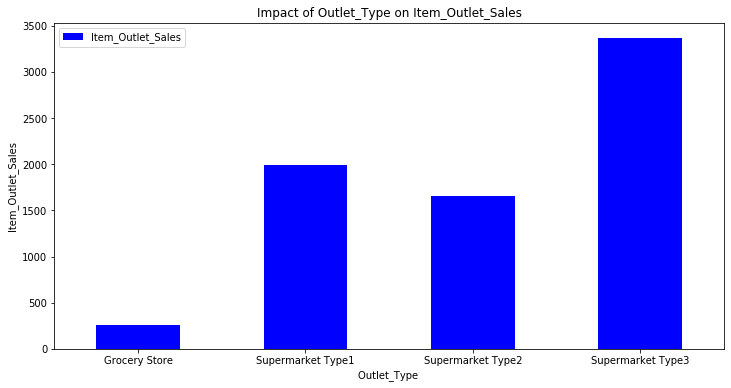

In [20]:
Outlet_Type_pivot = \
train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,6))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

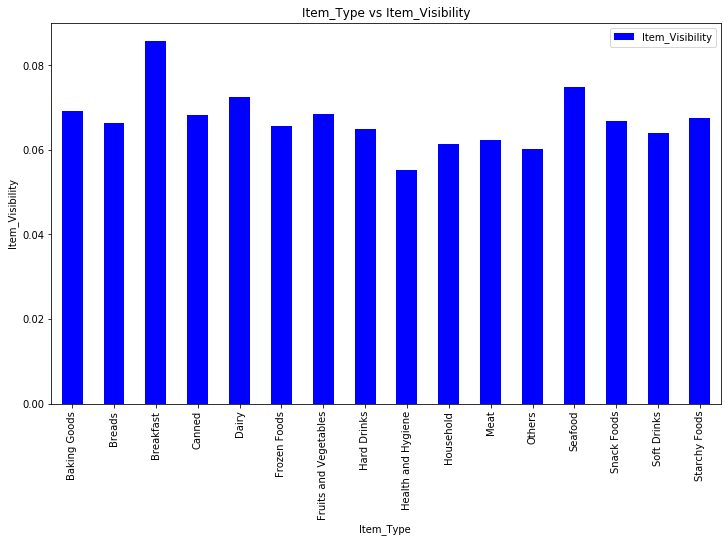

In [21]:
pivoTable = \
train.pivot_table(index='Item_Type', values="Item_Visibility", aggfunc=np.mean)

pivoTable.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Item_Type ")
plt.ylabel("Item_Visibility")
plt.title("Item_Type vs Item_Visibility")
plt.xticks(rotation=90)
plt.show()

### Correlation with numeric variables

In [22]:
numeric_features = train.select_dtypes(include=[np.number])
numeric_features.dtypes

Item_Weight                  float64
Item_Visibility              float64
Item_MRP                     float64
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
dtype: object

In [23]:
corr =numeric_features.corr()
corr

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.012049,0.024756,-0.008301,0.011550
Item_Visibility,-0.012049,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.024756,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.128625,0.567574,-0.049135,1.000000


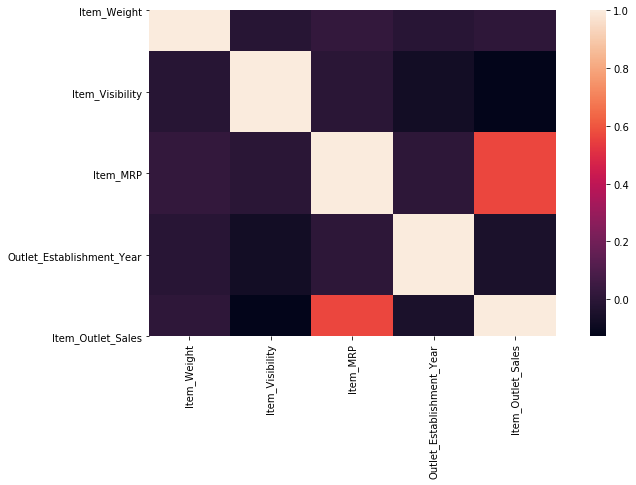

In [24]:
f, ax = plt.subplots(figsize=(12, 6))
sns.heatmap(corr, vmax=1, square=True);

#### Impact of outlet type and size on sales

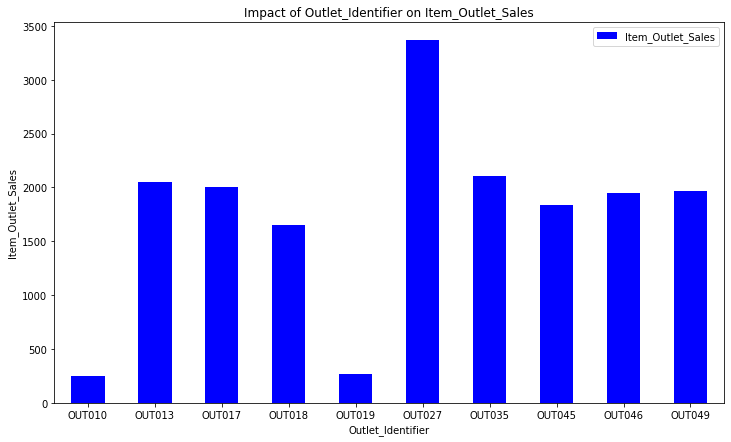

In [25]:
Outlet_Identifier_pivot = \
train.pivot_table(index="Outlet_Identifier", values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Identifier_pivot.plot(kind="bar", color="blue",figsize=(12,7))
plt.xlabel("Outlet_Identifier")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Identifier on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

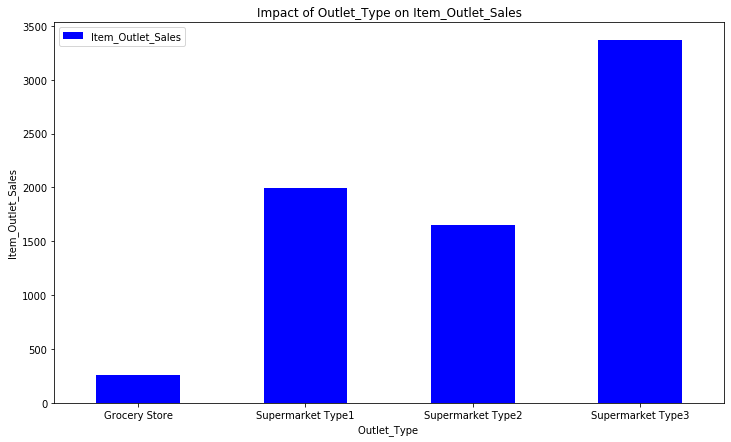

In [26]:
Outlet_Type_pivot = \
train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)
Outlet_Type_pivot.plot(kind='bar', color='blue',figsize=(12,7))
plt.xlabel("Outlet_Type ")
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

## Combining train and test set
To do feature engineering we combine the test and train datasets and split them later during modelling

In [27]:
test['Item_Outlet_Sales']=1
data = pd.concat([train,test], ignore_index = True)
data.to_csv("data.csv",index=False)
print(train.shape, test.shape, data.shape)

(8523, 12) (5681, 12) (14204, 12)


In [28]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


## Feature engineering

In [29]:
visibility_item_avg = data.pivot_table(values='Item_Visibility',index='Item_Identifier')

In [30]:
data['Item_Visibility'].replace(0.00000,np.nan)
data['Item_Visibility'].fillna(data.groupby('Item_Identifier')['Item_Visibility'].transform('mean'))

0        0.016047
1        0.019278
2        0.016760
3        0.000000
4        0.000000
           ...   
14199    0.013496
14200    0.142991
14201    0.073529
14202    0.000000
14203    0.104720
Name: Item_Visibility, Length: 14204, dtype: float64

In [31]:
data.Item_Visibility.isnull().any()

False

In [32]:
data['Outlet_Years'] = 2013 - data['Outlet_Establishment_Year'] #as the data is from 2013
data['Outlet_Years'].describe()

count    14204.000000
mean        15.169319
std          8.371664
min          4.000000
25%          9.000000
50%         14.000000
75%         26.000000
max         28.000000
Name: Outlet_Years, dtype: float64

In [33]:
data['Item_Type_Combined'] = data['Item_Identifier'].apply(lambda x: x[0:2])
data['Item_Type_Combined'] = data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
data['Item_Type_Combined'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: Item_Type_Combined, dtype: int64

In [34]:
print('Original Categories:')
print(data['Item_Fat_Content'].value_counts())

print('\nModified Categories:')
data['Item_Fat_Content'] = data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})

print(data['Item_Fat_Content'].value_counts())

Original Categories:
Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

Modified Categories:
Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64


In [35]:
data.loc[data['Item_Type_Combined']=="Non-Consumable",'Item_Fat_Content'] = "Non-Edible"
data['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [36]:
func = lambda x: x['Item_Visibility']/visibility_item_avg['Item_Visibility'][visibility_item_avg.index == x['Item_Identifier']][0]
data['Item_Visibility_MeanRatio'] = data.apply(func,axis=1).astype(float)
data['Item_Visibility_MeanRatio'].describe()

count    14204.000000
mean         1.000000
std          0.348382
min          0.000000
25%          0.921522
50%          0.962037
75%          1.042007
max          3.010094
Name: Item_Visibility_MeanRatio, dtype: float64

In [37]:
le = LabelEncoder()

data['Outlet'] = le.fit_transform(data['Outlet_Identifier'])

var_mod = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Item_Type_Combined','Outlet_Type','Outlet']
for i in var_mod:
    data[i] = le.fit_transform(data[i])

In [38]:
data = pd.get_dummies(data, columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined','Outlet'])

data.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
Outlet_Years                   int64
Item_Visibility_MeanRatio    float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
Item_Type_Combined_0           uint8
Item_Type_Combined_1           uint8
Item_Type_Combined_2           uint8
Outlet_0                       uint8
O

In [39]:
data.head()

,Item_Identifier,Item_Weight,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Item_Outlet_Sales,Outlet_Years,Item_Visibility_MeanRatio,...,Outlet_0,Outlet_1,Outlet_2,Outlet_3,Outlet_4,Outlet_5,Outlet_6,Outlet_7,Outlet_8,Outlet_9
0,FDA15,9.30,0.016047,Dairy,249.8092,OUT049,1999,3735.1380,14,0.931078,...,0,0,0,0,0,0,0,0,0,1
1,DRC01,5.92,0.019278,Soft Drinks,48.2692,OUT018,2009,443.4228,4,0.933420,...,0,0,0,1,0,0,0,0,0,0
2,FDN15,17.50,0.016760,Meat,141.6180,OUT049,1999,2097.2700,14,0.960069,...,0,0,0,0,0,0,0,0,0,1
3,FDX07,19.20,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,732.3800,15,0.000000,...,1,0,0,0,0,0,0,0,0,0
4,NCD19,8.93,0.000000,Household,53.8614,OUT013,1987,994.7052,26,0.000000,...,0,1,0,0,0,0,0,0,0,0


### Dropping converted variables

In [40]:
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

## Splitting the data into train and test

In [41]:
#Divide into test and train:
train = data.loc[data['Item_Outlet_Sales']!=1]
test = data.loc[data['Item_Outlet_Sales']==1]

#Drop unnecessary columns:
test.drop(['Item_Outlet_Sales'],axis=1,inplace=True)

test.drop(test.tail(1).index, 
        inplace = True) 
train.drop(train.tail(3).index, 
        inplace = True) 

#Export files as modified versions:
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

E:\anaconda\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [42]:
train.shape

(8520, 34)

In [43]:
test.shape

(5680, 33)

## Prediction

In [44]:
train_new = pd.read_csv('train_modified.csv')
test_new= pd.read_csv('test_modified.csv')

In [45]:
data_new = pd.concat([train_new,test_new], ignore_index = True)
data_new.to_csv("data_new.csv",index=False)
print(train_new.shape, test_new.shape, data_new.shape)

E:\anaconda\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


(8520, 34) (5680, 33) (14200, 34)


In [46]:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import metrics
from sklearn.model_selection import cross_validate


def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validate(alg, dtrain[predictors],(dtrain[target]) , cv=20, scoring='neg_mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score['test_score']))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error((dtrain[target]).values, dtrain_predictions)))
    print("CV Score : Mean - %.4g | Std - %.4g | Min - %.4g | Max - %.4g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)


Model Report
RMSE : 1128
CV Score : Mean - 1129 | Std - 44.35 | Min - 1074 | Max - 1211


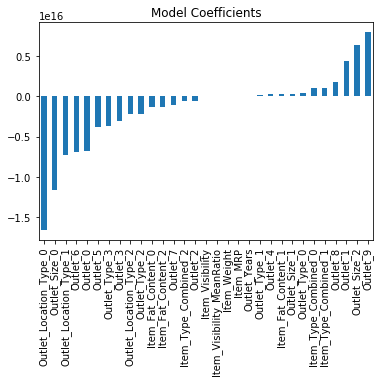

In [47]:
LR = LinearRegression(normalize=True)

predictors = train_new.columns.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'])
modelfit(LR, train_new, test_new, predictors, target, IDcol, 'LR.csv')

coef1 = pd.Series(LR.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1069
CV Score : Mean - 1099 | Std - 43.56 | Min - 1032 | Max - 1182


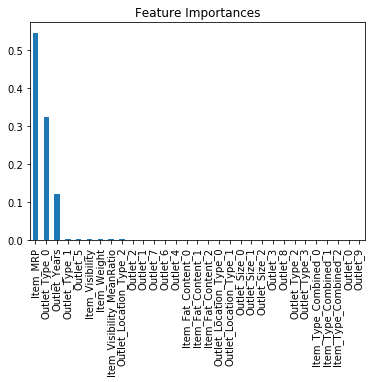

In [51]:
RF = DecisionTreeRegressor(max_depth=8, min_samples_leaf=150)
modelfit(RF, train_new, test_new, predictors, target, IDcol, 'RF.csv')

coef4 = pd.Series(RF.feature_importances_, predictors).sort_values(ascending=False)
coef4.plot(kind='bar', title='Feature Importances')